# 

In [3]:
# Census Data Exploration 
## Hi! My name is Ashley and I'll be exploring census housing data

In [33]:
# importing python libraries
import pandas as pd
import geopandas as gpd

In [34]:
# read and add shapefile to notebook
housing = pd.read_csv('data/housing - DECENNIALDP2020.DP1-Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/housing - DECENNIALDP2020.DP1-Data.csv'

In [4]:
#size of the data
housing.shape

(2498, 322)

In [ ]:
#We can see that 2498 represents all census tracts that exist in Los Angeles county. 

In [5]:
housing.head()

,GEO_ID,NAME,DP1_0001C,DP1_0002C,DP1_0003C,DP1_0004C,DP1_0005C,DP1_0006C,DP1_0007C,DP1_0008C,...,DP1_0151P,DP1_0152P,DP1_0153P,DP1_0154P,DP1_0155P,DP1_0156P,DP1_0157P,DP1_0158P,DP1_0159P,DP1_0160P
0,6037101110,Census Tract 1011.10; Los Angeles County; Cali...,4926,223,253,233,229,254,349,308,...,0.2,0.7,0.1,0.1,0.4,(X),(X),100.0,51.4,48.6
1,6037101122,Census Tract 1011.22; Los Angeles County; Cali...,3728,200,159,171,204,168,171,209,...,0.0,0.1,0.2,0.0,0.9,(X),(X),100.0,84.8,15.2
2,6037101220,Census Tract 1012.20; Los Angeles County; Cali...,3344,149,144,155,179,212,237,231,...,0.3,0.0,0.1,0.0,1.7,(X),(X),100.0,39.8,60.2
3,6037101221,Census Tract 1012.21; Los Angeles County; Cali...,3444,187,194,204,174,196,215,331,...,1.2,0.1,0.0,0.0,1.2,(X),(X),100.0,16.9,83.1
4,6037101222,Census Tract 1012.22; Los Angeles County; Cali...,2808,165,163,177,171,152,225,250,...,0.5,0.0,0.3,0.0,0.3,(X),(X),100.0,14.6,85.4


In [6]:
#data types present
housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 322 columns):
 #    Column     Non-Null Count  Dtype  
---   ------     --------------  -----  
 0    GEO_ID     2498 non-null   int64  
 1    NAME       2498 non-null   object 
 2    DP1_0001C  2498 non-null   int64  
 3    DP1_0002C  2498 non-null   int64  
 4    DP1_0003C  2498 non-null   int64  
 5    DP1_0004C  2498 non-null   int64  
 6    DP1_0005C  2498 non-null   int64  
 7    DP1_0006C  2498 non-null   int64  
 8    DP1_0007C  2498 non-null   int64  
 9    DP1_0008C  2498 non-null   int64  
 10   DP1_0009C  2498 non-null   int64  
 11   DP1_0010C  2498 non-null   int64  
 12   DP1_0011C  2498 non-null   int64  
 13   DP1_0012C  2498 non-null   int64  
 14   DP1_0013C  2498 non-null   int64  
 15   DP1_0014C  2498 non-null   int64  
 16   DP1_0015C  2498 non-null   int64  
 17   DP1_0016C  2498 non-null   int64  
 18   DP1_0017C  2498 non-null   int64  
 19   DP1_0018C  2498 non-null 

In [ ]:
#No null data, all data is filled out with value. 

In [10]:
housing.GEO_ID.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: GEO_ID, dtype: int64

In [11]:
#Leading zeros are gone so we'll rectify that in the following steps. 

In [15]:
#dtype ensures that the columns are read in as strings for leading zeros = 
housing = pd.read_csv(
    'housing - DECENNIALDP2020.DP1-Data.csv',
    dtype=
    {
        'GEO_ID':str,
        'NAME':str,
    }
)

/tmp/ipykernel_139/2484621753.py:2: DtypeWarning: Columns (74,75,76,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,319,320,321) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv(


In [16]:
housing.head()

,GEO_ID,NAME,DP1_0001C,DP1_0002C,DP1_0003C,DP1_0004C,DP1_0005C,DP1_0006C,DP1_0007C,DP1_0008C,...,DP1_0151P,DP1_0152P,DP1_0153P,DP1_0154P,DP1_0155P,DP1_0156P,DP1_0157P,DP1_0158P,DP1_0159P,DP1_0160P
0,06037101110,Census Tract 1011.10; Los Angeles County; Cali...,4926,223,253,233,229,254,349,308,...,0.2,0.7,0.1,0.1,0.4,(X),(X),100.0,51.4,48.6
1,06037101122,Census Tract 1011.22; Los Angeles County; Cali...,3728,200,159,171,204,168,171,209,...,0.0,0.1,0.2,0.0,0.9,(X),(X),100.0,84.8,15.2
2,06037101220,Census Tract 1012.20; Los Angeles County; Cali...,3344,149,144,155,179,212,237,231,...,0.3,0.0,0.1,0.0,1.7,(X),(X),100.0,39.8,60.2
3,06037101221,Census Tract 1012.21; Los Angeles County; Cali...,3444,187,194,204,174,196,215,331,...,1.2,0.1,0.0,0.0,1.2,(X),(X),100.0,16.9,83.1
4,06037101222,Census Tract 1012.22; Los Angeles County; Cali...,2808,165,163,177,171,152,225,250,...,0.5,0.0,0.3,0.0,0.3,(X),(X),100.0,14.6,85.4


In [18]:
housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 322 columns):
 #    Column     Non-Null Count  Dtype  
---   ------     --------------  -----  
 0    GEO_ID     2498 non-null   object 
 1    NAME       2498 non-null   object 
 2    DP1_0001C  2498 non-null   int64  
 3    DP1_0002C  2498 non-null   int64  
 4    DP1_0003C  2498 non-null   int64  
 5    DP1_0004C  2498 non-null   int64  
 6    DP1_0005C  2498 non-null   int64  
 7    DP1_0006C  2498 non-null   int64  
 8    DP1_0007C  2498 non-null   int64  
 9    DP1_0008C  2498 non-null   int64  
 10   DP1_0009C  2498 non-null   int64  
 11   DP1_0010C  2498 non-null   int64  
 12   DP1_0011C  2498 non-null   int64  
 13   DP1_0012C  2498 non-null   int64  
 14   DP1_0013C  2498 non-null   int64  
 15   DP1_0014C  2498 non-null   int64  
 16   DP1_0015C  2498 non-null   int64  
 17   DP1_0016C  2498 non-null   int64  
 18   DP1_0017C  2498 non-null   int64  
 19   DP1_0018C  2498 non-null 

In [19]:
housing.GEO_ID.head()

0    06037101110
1    06037101122
2    06037101220
3    06037101221
4    06037101222
Name: GEO_ID, dtype: object

In [20]:
#Ok, confirmation that the data type was changed to include leading zeros. 

In [22]:
#Now I want to make sure that the columns are all filled out and delete any that are empty.
housing.columns[housing.isna().all()].tolist()

[]

In [23]:
#Nice, no empty columns. No further steps in this stage. 

In [24]:
#Now I want to select specific columns to clean up the data. I chose these specific columns to show occupied and vacant housing units, plus any households with children below 18 in them. 
columns_to_keep = ['GEO_ID',
                   'DP1_0147C',
                   'DP1_0148C',
                   'DP1_0149C',
                   'DP1_0134P',
                   'DP1_0136P',
                   'DP1_0140P',
                   'DP1_0144P',]
housing2 = housing[columns_to_keep]

In [25]:
housing2

,GEO_ID,DP1_0147C,DP1_0148C,DP1_0149C,DP1_0134P,DP1_0136P,DP1_0140P,DP1_0144P
0,06037101110,1806,1753,53,18.1,1.0,2.4,3.8
1,06037101122,1377,1358,19,19.5,1.1,1.3,2.1
2,06037101220,1351,1308,43,14.1,2.1,1.3,3.7
3,06037101221,1363,1305,58,20.6,2.3,1.3,4.2
4,06037101222,1042,1024,18,19.4,2.8,2.1,6.3
...,...,...,...,...,...,...,...,...
2493,06037980038,2,2,0,0.0,100.0,0.0,0.0
2494,06037980039,0,0,0,-,-,-,-
2495,06037990100,0,0,0,-,-,-,-
2496,06037990200,0,0,0,-,-,-,-


In [27]:
#I'll start renaming the columns to not get confused. 
columns = list(housing2)
columns

['GEO_ID',
 'DP1_0147C',
 'DP1_0148C',
 'DP1_0149C',
 'DP1_0134P',
 'DP1_0136P',
 'DP1_0140P',
 'DP1_0144P']

In [28]:
housing2.columns = ['FIPS',
'TotalHousingUnits',
'OccupiedHousingUnits',
'VacantHousingUnits',
'MarriedwithChildren',
'CohabitingwithChildren',
'MaleHoueholderwithChildren',
'FemaleHouseholderwithChildren',]

In [29]:
housing2.sample(5)

,FIPS,TotalHousingUnits,OccupiedHousingUnits,VacantHousingUnits,MarriedwithChildren,CohabitingwithChildren,MaleHoueholderwithChildren,FemaleHouseholderwithChildren
350,06037139402,984,939,45,24.8,1.2,1.6,1.8
16,06037103401,1022,986,36,19.0,1.9,1.8,2.2
569,06037204410,649,617,32,16.9,5.3,2.1,9.1
769,06037224600,840,777,63,18.7,6.8,3.6,7.5
582,06037206051,1233,1086,147,4.8,0.4,0.3,0.6


In [30]:
#swag, it worked. Let's do some statistical analysis on the data. 

In [31]:
housing2['TotalHousingUnits'].head()

0    1806
1    1377
2    1351
3    1363
4    1042
Name: TotalHousingUnits, dtype: int64

In [32]:
housing2['TotalHousingUnits'].mean()

1437.9427542033627

In [33]:
housing2['TotalHousingUnits'].median()

1365.5

In [34]:
housing2['TotalHousingUnits'].mode()

0    0
Name: TotalHousingUnits, dtype: int64

In [35]:
housing2['TotalHousingUnits'].describe()

count    2498.000000
mean     1437.942754
std       612.043855
min         0.000000
25%      1051.000000
50%      1365.500000
75%      1748.000000
max      8065.000000
Name: TotalHousingUnits, dtype: float64

<Axes: ylabel='Frequency'>

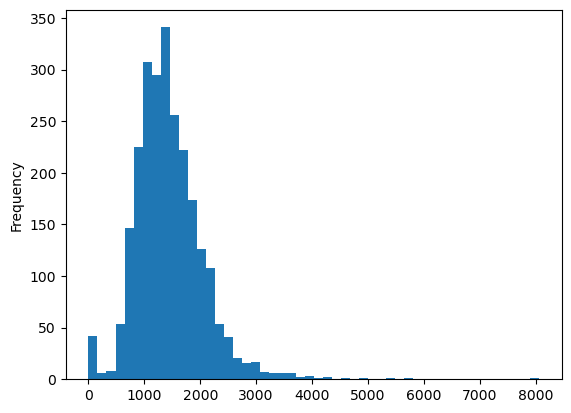

In [37]:
housing2['TotalHousingUnits'].plot.hist(bins=50)

<Axes: >

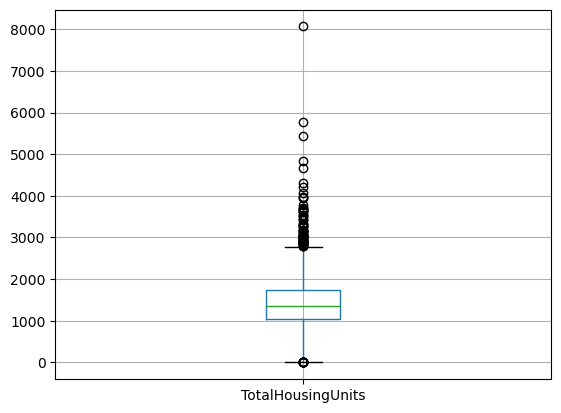

In [39]:
housing2.boxplot(column=['TotalHousingUnits'])

In [40]:
#Let's start Mapping Data 

In [50]:
tracts=gpd.read_file('Census_Tracts_2020-Copy1.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

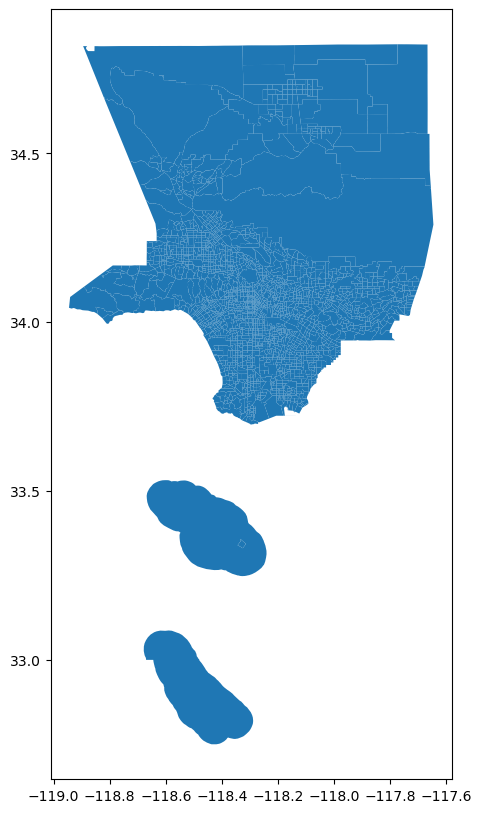

In [51]:
tracts.plot(figsize=(12,10))

In [52]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [53]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [55]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [56]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [57]:
tracts_housing=tracts.merge(housing2,on="FIPS")

In [58]:
tracts_housing.head()

,CT20,geometry,FIPS,TotalHousingUnits,OccupiedHousingUnits,VacantHousingUnits,MarriedwithChildren,CohabitingwithChildren,MaleHoueholderwithChildren,FemaleHouseholderwithChildren
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1806,1753,53,18.1,1.0,2.4,3.8
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,1377,1358,19,19.5,1.1,1.3,2.1
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,1351,1308,43,14.1,2.1,1.3,3.7
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1363,1305,58,20.6,2.3,1.3,4.2
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,1042,1024,18,19.4,2.8,2.1,6.3


<Axes: >

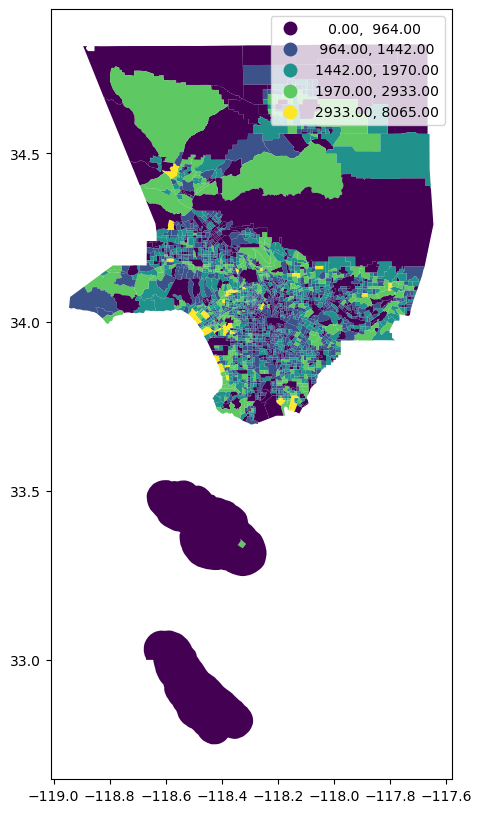

In [60]:
tracts_housing.plot(figsize=(12,10),
                 column='TotalHousingUnits',
                 legend=True, 
                 scheme='NaturalBreaks')

In [61]:
#This shows the concentration of total housing in LA County

<Axes: >

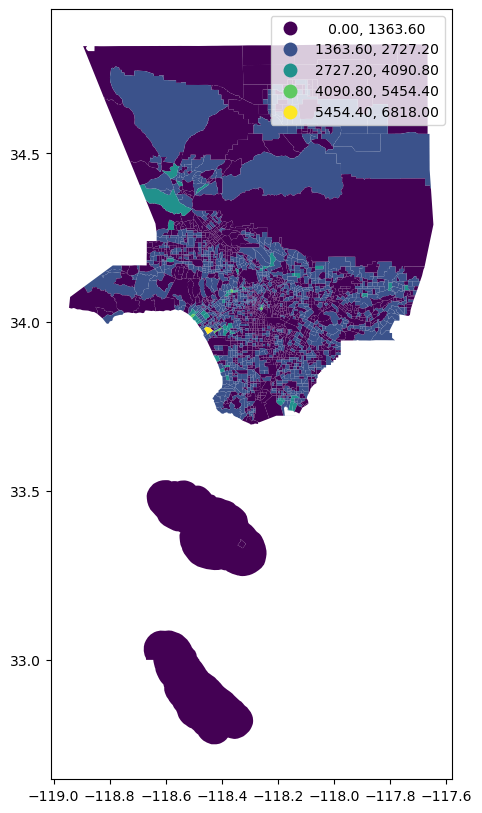

In [63]:
#Now plotting map of occupied housing in LA county
tracts_housing.plot(figsize=(12,10),
                 column='OccupiedHousingUnits',
                 legend=True, 
                 scheme='equal_interval')

<Axes: >

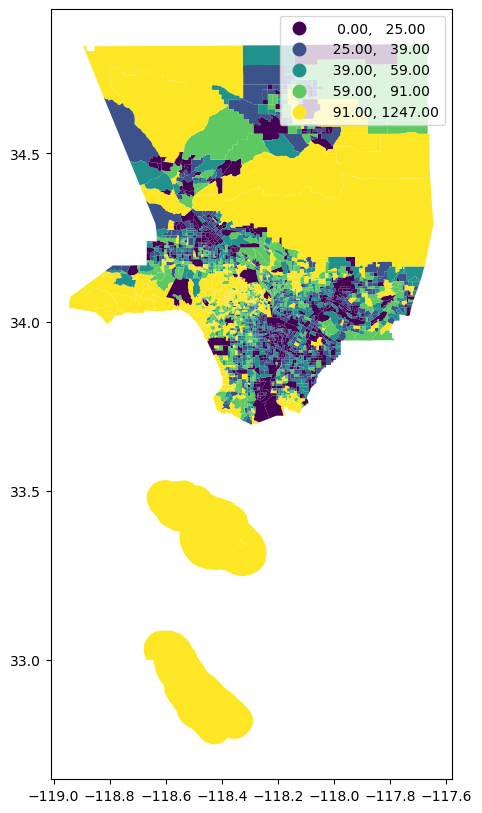

In [65]:
#Now plotting map of vacant housing in LA county
tracts_housing.plot(figsize=(12,10),
                 column='VacantHousingUnits',
                 legend=True, 
                 scheme='quantiles')